In [1]:
from sklearn import datasets, metrics, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import precision_score, recall_score, accuracy_score, log_loss
from sklearn.metrics import f1_score, precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Utility

In [2]:
def metrics_and_plot(clf, x_test, y_test, preds=None):
    if preds is None:
        preds = clf.predict(x_test)
    y_probs = clf.predict_proba(x_test)[:,1]
    
    print("Accuracy : ", accuracy_score(y_test, preds),
          "\nPrecision : ", precision_score(y_test, preds),
          "\nRecall : ", recall_score(y_test, preds),
          "\nF1 score : ", f1_score(y_test, preds),
          "\nLog loss : ", log_loss(y_test, preds))
    
    #plotting precission recall
    plt.figure(figsize=(15, 5))
    prec, rec, thresh = precision_recall_curve(y_test, y_probs)
    plt.plot(thresh, prec[:-1], label="precision")
    plt.plot(thresh, rec[:-1], label="recall")
    plt.xlabel("threshold")
    plt.title("Precission Recall")
    plt.legend()
    
    plot_precision_recall_curve(clf, x_test, y_test)
    plt.title("Precission Recall - lib")
    plt.show()
    
    #plotting ROC
    plot_roc_curve(clf, x_test, y_test)
    plt.title("ROC")
    
    
    

### Reading Data

In [3]:
bioresponse = pd.read_csv('bioresponse.csv')
features_cols = set(bioresponse.columns)
features_cols.remove('Activity')
x_train, x_test, y_train, y_test = train_test_split(bioresponse[features_cols],
                                                    bioresponse['Activity'],
                                                    test_size=0.3)


### Small decision Tree

In [4]:
clf = tree.DecisionTreeClassifier(random_state=1, max_depth=5)
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [5]:
predictions = clf.predict(x_test)
y_probs = clf.predict_proba(x_test)[:,1]
accuracy_score(y_test, predictions)

0.7602131438721137

### Metrics : Small decision Tree

Accuracy :  0.7602131438721137 
Precision :  0.7712933753943217 
Recall :  0.7964169381107492 
F1 score :  0.7836538461538463 
Log loss :  8.282047573937179


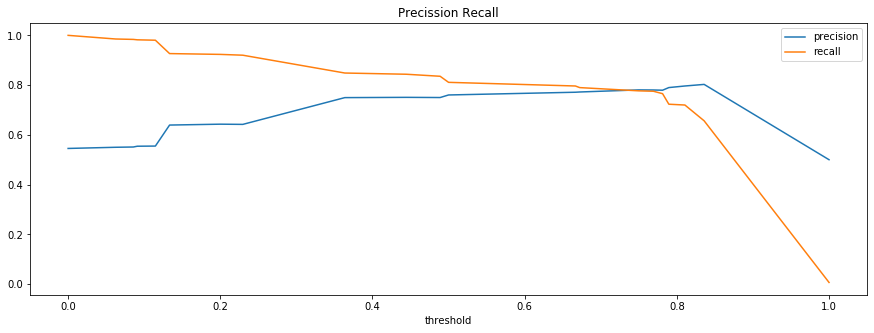

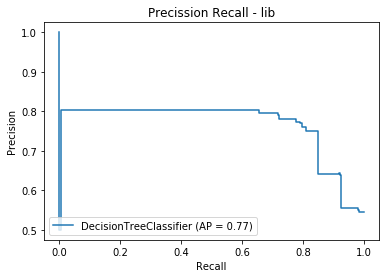

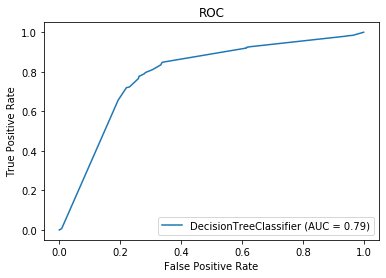

In [6]:
metrics_and_plot(clf, x_test, y_test)

### Deep decision Tree

In [7]:
clf = tree.DecisionTreeClassifier(random_state=1, max_depth=15)
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [8]:
predictions = clf.predict(x_test)
y_probs = clf.predict_proba(x_test)[:,1]
accuracy_score(y_test, predictions)

0.7442273534635879

### Metrics : Deep decision Tree

Accuracy :  0.7442273534635879 
Precision :  0.7531055900621118 
Recall :  0.7899022801302932 
F1 score :  0.7710651828298887 
Log loss :  8.834187156061882


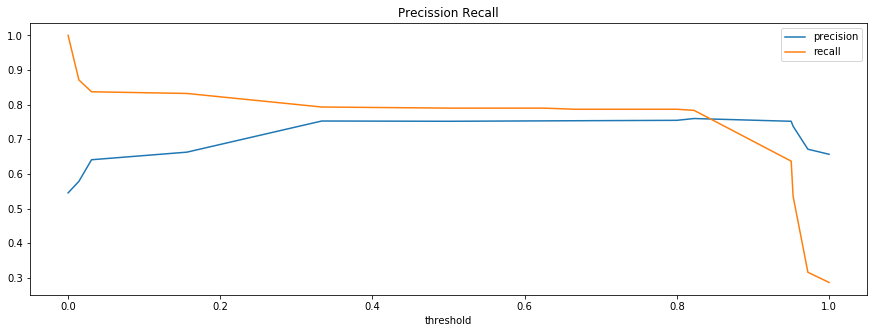

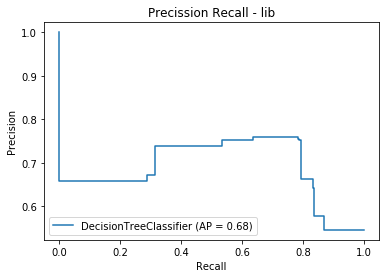

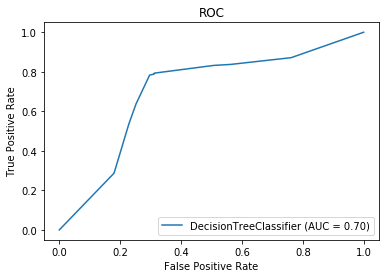

In [9]:
metrics_and_plot(clf, x_test, y_test)

### Random forest small tree

In [10]:
rf_classifier_low_depth = RandomForestClassifier(n_estimators = 50, max_depth = 2, random_state = 1)
rf_classifier_low_depth.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [11]:
predictions = rf_classifier_low_depth.predict(x_test)
y_probs = rf_classifier_low_depth.predict_proba(x_test)[:,1]
accuracy_score(y_test, predictions)

0.6873889875666075

### Metrics: shallow random forest

Accuracy :  0.6873889875666075 
Precision :  0.6814404432132964 
Recall :  0.8013029315960912 
F1 score :  0.7365269461077845 
Log loss :  10.797365185095476


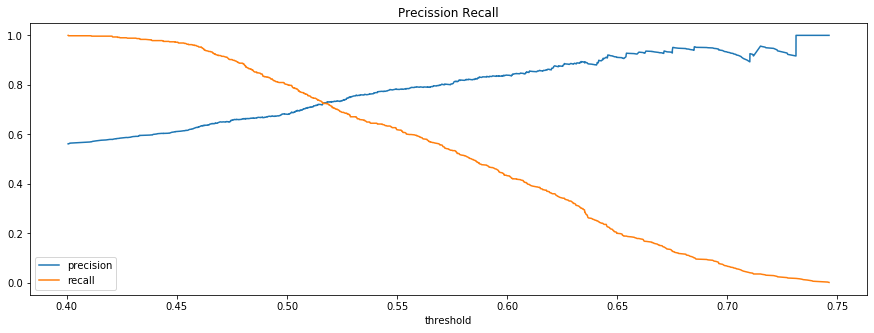

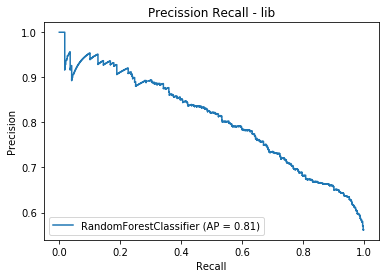

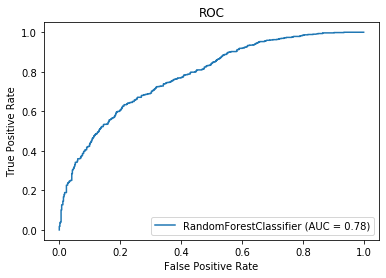

In [12]:
metrics_and_plot(rf_classifier_low_depth, x_test, y_test)

### Random forest deep tree

In [13]:
rf_classifier_deep_depth = RandomForestClassifier(n_estimators = 50, max_depth = 10, random_state = 1)
rf_classifier_deep_depth.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [14]:
predictions = rf_classifier_deep_depth.predict(x_test)
y_probs = rf_classifier_deep_depth.predict_proba(x_test)[:,1]
accuracy_score(y_test, predictions)

0.7815275310834814

### Metrics: deep random forest

Accuracy :  0.7815275310834814 
Precision :  0.7967741935483871 
Recall :  0.8045602605863192 
F1 score :  0.8006482982171799 
Log loss :  7.545861227730225


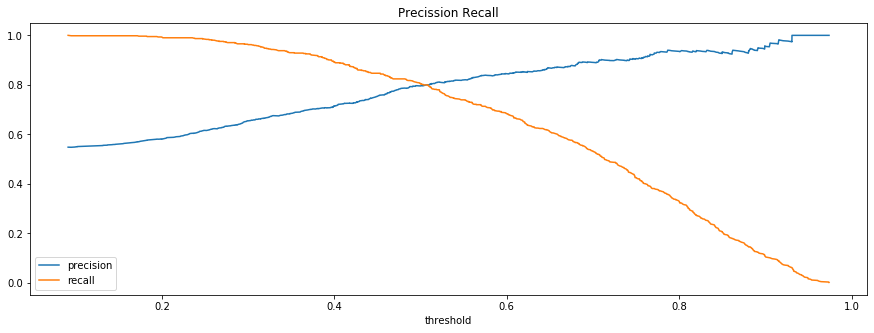

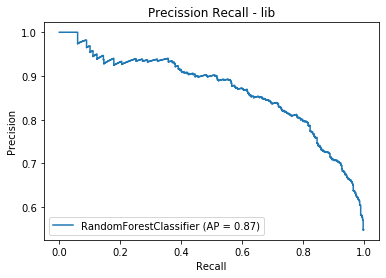

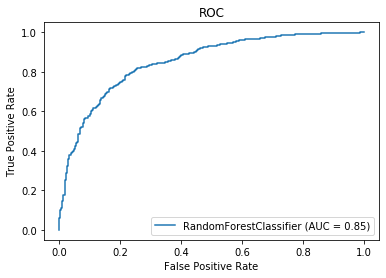

In [15]:
metrics_and_plot(rf_classifier_deep_depth, x_test, y_test)

### Classifier avoiding FN

Steps:
    1. create classifier
    2. show confusion matrix and analyse it
    3. change threshold for the classifier
    4. if results are not good, change class weight
    5. change 3 and 4 until satisfaying result
    
Classifier: Adaboost

### Step 1

In [16]:
from sklearn.ensemble import AdaBoostClassifier

In [17]:
clf = AdaBoostClassifier(n_estimators=100, random_state=1)
clf.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=1)

In [18]:
predictions = clf.predict(x_test)
y_probs = clf.predict_proba(x_test)[:,1]
accuracy_score(y_test, predictions)

0.7557726465364121

Accuracy :  0.7557726465364121 
Precision :  0.768621236133122 
Recall :  0.7899022801302932 
F1 score :  0.7791164658634538 
Log loss :  8.435417628619224


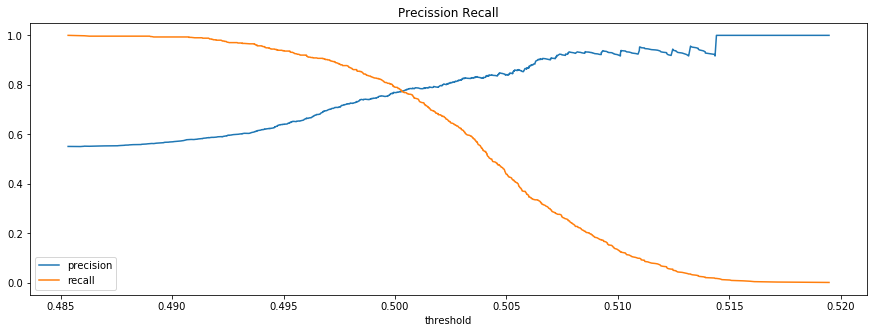

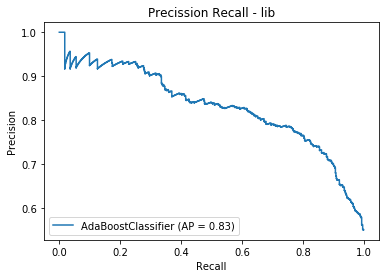

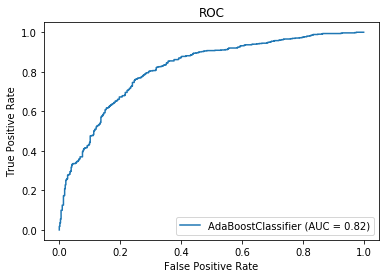

In [19]:
metrics_and_plot(clf, x_test, y_test)

### Step 2

In [20]:
((tn, fp), (fn, tp)) = metrics.confusion_matrix(y_test, predictions, normalize='true')

print("TN (0 / pred 0) : ", tn)
print("FP (0 / pred 1) : ", fp)
print("FN (1 / pred 0) : ", fn)
print("tP (1 / pred 1) : ", tp)

TN (0 / pred 0) :  0.71484375
FP (0 / pred 1) :  0.28515625
FN (1 / pred 0) :  0.21009771986970685
tP (1 / pred 1) :  0.7899022801302932


### Step 3

In [21]:
new_preds = np.where(y_probs >= 0.3, 1, 0)

((tn, fp), (fn, tp)) = metrics.confusion_matrix(y_test, new_preds, normalize='true')

print("TN (0 / pred 0) : ", tn)
print("FP (0 / pred 1) : ", fp)
print("FN (1 / pred 0) : ", fn)
print("tP (1 / pred 1) : ", tp)

TN (0 / pred 0) :  0.0
FP (0 / pred 1) :  1.0
FN (1 / pred 0) :  0.0
tP (1 / pred 1) :  1.0


Accuracy :  0.5452930728241563 
Precision :  0.5452930728241563 
Recall :  1.0 
F1 score :  0.7057471264367816 
Log loss :  15.70538446543386


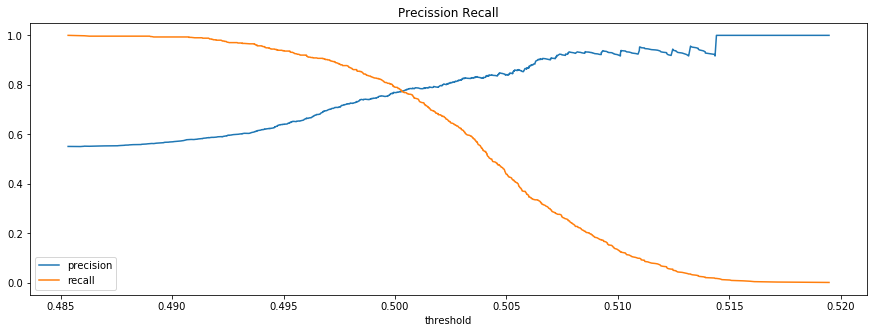

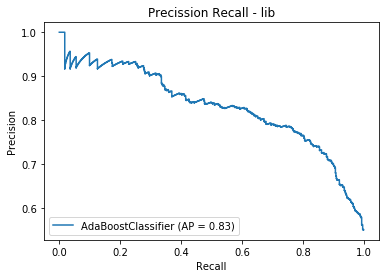

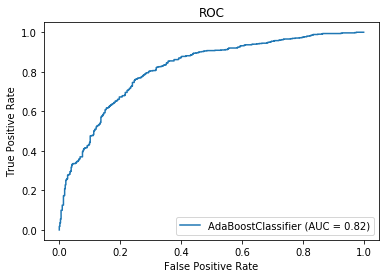

In [22]:
metrics_and_plot(clf, x_test, y_test, new_preds)

### Conclusion
changing threshold was enough to lower the false negative to 0!
no need to change the class weights.
there was a trade off with the accuracy.